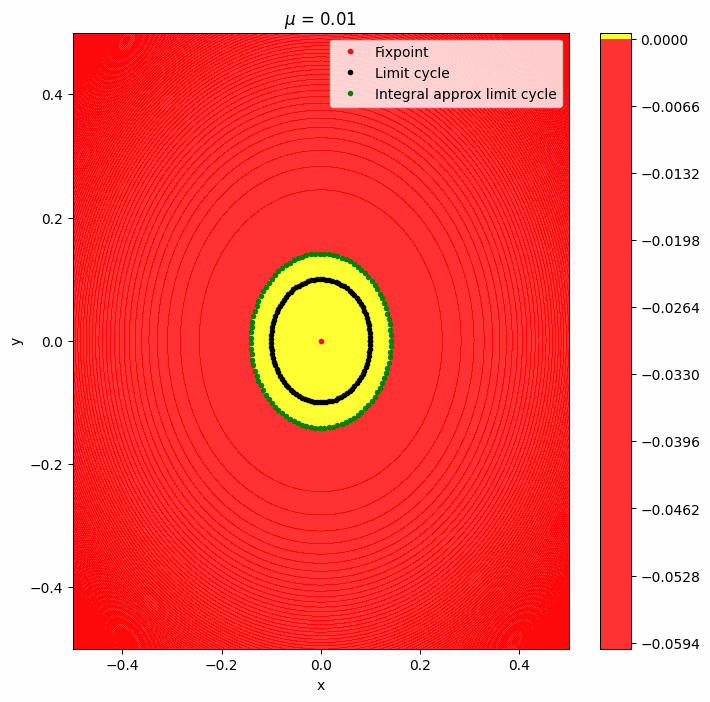

In [4]:
import numpy as np
import matplotlib
import imageio.v2 as imageio
from IPython.display import Image
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sm
from sympy import symbols, Matrix
import os
matplotlib.use('TkAgg')  # or 'Qt5Agg'
import matplotlib.colors as mcolors
plt.rcParams['figure.figsize'] = [8,8]

# Parameters

# Dynamics functions
def x_dot(x,y,mu,w = 1):
    return (mu-x**2-y**2)*x-w*y #normalformen for superkritiske hopf.
def y_dot(x,y,mu,w = 1):
    return (mu-2*x**2-2*y**2)*y+w*x

# Compute potential function (heuristically)
def potential_function(x, y,mu):
    return 1/2*(mu-(x**2+y**2)/2)*(x**2+y**2)

def make_gif(filelog,gif_name,display_length):
    with imageio.get_writer(f'{gif_name}.gif', mode='I', duration=display_length, loop = 0) as writer: #Creating the gif
        for filename in filelog:
            image = imageio.imread(filename)
            writer.append_data(image)
    for filename in filelog: #Removing the temporary images
        os.remove(filename)

def intgrator_rk4(func_x,func_y,dt,x,y,paramsx,paramsy): #Input function, timestep, coordinates and finally params as [...,...,...]
    
    k1x = func_x(x,y,*paramsx)*dt
    k1y = func_y(x,y,*paramsy)*dt
    
    k2x = func_x(x+0.5*k1x, y+0.5*k1y, *paramsx)*dt
    k2y = func_y(x+0.5*k1x, y+0.5*k1y, *paramsy)*dt
    
    k3x = func_x(x+0.5*k2x, y+0.5*k2y, *paramsx)*dt
    k3y = func_y(x+0.5*k2x, y+0.5*k2y, *paramsy)*dt
    
    k4x = func_x(x+k3x,y+k3y, *paramsx)*dt
    k4y = func_y(x+k3x,y+k3y, *paramsy)*dt
    
    xnew = x + 1./6*(k1x+2*k2x+2*k3x+k4x)
    ynew = y + 1./6*(k1y+2*k2y+2*k3y+k4y)
    return xnew, ynew



Points = 1000
L = 0.5
xn = np.linspace(-L,L,Points)
yn = np.linspace(-L,L,Points)
X,Y = np.meshgrid(xn,yn)
def contour_gif(mulist, npoints = 1, dt = 0.1):
    filenames = []
    w = 1
    global X, Y,L
    cmap = plt.get_cmap('PiYG')
    x0,y0 = 0, L/10
    x1,y1 = L/10, L/10
    #norm = mcolors.Normalize(vmin=np.min(potential_function(X,Y,mulist[0])), vmax=np.max(potential_function(X,Y,mulist[-1])))
    cmap = mcolors.ListedColormap(['red',"blue", 'yellow'])
    #cmap = 'viridis'
    # Create a norm that maps values to the correct colors
    bounds = [-1, 0, 1]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    theta = np.linspace(0, 2 * np.pi, 100)

    for mu in mulist:
        sol_x, sol_y = np.zeros(npoints), np.zeros(npoints)
        sol_x2, sol_y2 = np.zeros(npoints), np.zeros(npoints)
        sol_x[0], sol_y[0] = x0, y0
        sol_x2[0], sol_y2[0] = x1, y1
        xmap,ymap = np.copy(x0),np.copy(y0) 
        xmap2,ymap2 = np.copy(x1),np.copy(y1) 

        fig, ax = plt.subplots()
        # Compute and plot trajectories to visualize the dynamics
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title(f'$\mu$ = {mu}')
        ax.set_xlim(-L,L)
        ax.set_ylim(-L,L)
        V = potential_function(X, Y, mu)


        contourf = ax.contourf(X, Y, V, levels=100, cmap=cmap, norm=norm, alpha=0.8)
        cbar = plt.colorbar(contourf, ax=ax)

        ax.plot(0,0, '.', color='red', label = "Fixpoint")
        for n in range(1,npoints):
            xmap, ymap = intgrator_rk4(x_dot, y_dot, dt, xmap, ymap, [mu], [mu])
            sol_x[n], sol_y[n] = xmap, ymap
            xmap2, ymap2 = intgrator_rk4(x_dot, y_dot, dt, xmap2, ymap2, [mu], [mu])
            sol_x2[n], sol_y2[n] = xmap2, ymap2
        #ax.plot(sol_x, sol_y, 'b-', label = 'Trajectory 1')
        #ax.plot(sol_x2, sol_y2, 'g-', label = 'Trajectory 2')
        if mu > 0:
            ax.plot(np.sqrt(mu)*np.cos(theta),np.sqrt(mu)*np.sin(theta), '.', color = 'black', label = 'Limit cycle')
            ax.plot(np.sqrt(2*mu)*np.cos(theta),np.sqrt(2*mu)*np.sin(theta), '.', color = 'green', label = 'Integral approx limit cycle')
        plt.legend(loc = 'upper right')
        filenamex = f'temp_plot_{mu:.3f}_x.png'
        plt.savefig(filenamex, bbox_inches = 'tight', pad_inches = 0.1)
        filenames.append(filenamex)
        plt.close()
        cbar.remove()
    make_gif(filenames,'contour_mulist',display_length = 2) 
    #print(np.max(potential_function(X,Y,mulist[-1])))
mulist = np.arange(-0.02,0.01,0.001)
contour_gif([0.01])
Image(filename='contour_mulist.gif')


In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,potential_function(X,Y,-0.01))
plt.show()

In [194]:
Points = 20
L = 0.8
xn = np.linspace(-L,L,Points)
yn = np.linspace(-L,L,Points)
X,Y = np.meshgrid(xn,yn)
fig = plt.figure()
mu = 0.1
theta = np.linspace(0, 2 * np.pi, 100)
#limitx, limity = np.sqrt(mu)*np.cos(theta),np.sqrt(mu)*np.sin(theta)
alimitx, alimity = np.sqrt(mu/2)*np.cos(theta),np.sqrt(mu/2)*np.sin(theta)
#def real_pot(x, y,mu):
#    return 1/2*(mu-(x**2+y**2))*(x**2+y**2)


def approx_func(x, y,mu):
    return (mu-x**2*y**2)# only eigenvalue
def better_approx(x,y,mu):
    return (mu - x**4/4 - y**4/4 - x**2-y**2)
ax = fig.add_subplot(111, projection='3d')
#V = real_pot(X, Y, mu)
npoints = 1
dt = 0.1
xmap, ymap = L,0
cmap = 'viridis'

sol_x,sol_y = np.zeros(npoints), np.zeros(npoints)
sol_x[0], sol_y[0] = xmap, ymap
#surface = ax.plot_surface(X, Y, abs(V), edgecolors ='none', cmap=cmap, alpha = 0.5)

for n in range(1,npoints):
    xmap, ymap = intgrator_rk4(x_dot, y_dot, dt, xmap, ymap, [mu], [mu])
    sol_x[n], sol_y[n] = xmap, ymap

#ax.plot(limitx,limity, (approx_func(limitx,limity,mu)), 'black')
#plt.show()
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y, (approx_func(X,Y,mu)), edgecolors = 'None', cmap = "plasma", alpha = 0.5)
ax.plot(alimitx,alimity, approx_func(alimitx,alimity,mu),color = 'green')
ax.plot_surface(X,Y,better_approx(X,Y,mu), edgecolors = 'None', cmap = "viridis", alpha = 0.5)
#ax.plot(sol_x,sol_y, np.abs(potential_function(sol_x,sol_y,mu)), 'red')
#cbar = plt.colorbar(surface, ax=ax)

plt.show()

In [1]:
Points = 20
L = 0.8
xn = np.linspace(-L,L,Points)
yn = np.linspace(-L,L,Points)
X,Y = np.meshgrid(xn,yn)
fig, ax = plt.subplots()

def eigen1approx(x, y,mu):
    tau = mu/2*y**2
    delta = -3/4*x**2*y**2
    return (tau + np.sqrt(tau**2 - 4*delta))/2
def eigen2approx(x,y,mu):
    tau = mu/2*y**2
    delta = -3/4*x**2*y**2
    return (tau - np.sqrt(tau**2 - 4*delta))/2

def eigen1(x,y,mu):
    tau = mu/2*y**2
    delta = -3/4*x**2*y**2 + mu/3*y**3*x
    return (tau + np.sqrt(tau**2 - 4*delta))/2
def eigen2(x,y,mu):
    tau = mu/2*y**2
    delta = -3/4*x**2*y**2 + mu/3*y**3*x
    return (tau + np.sqrt(tau**2 - 4*delta))/2
#V = real_pot(X, Y, mu)
npoints = 1
dt = 0.1
xmap, ymap = L,0
cmap = 'viridis'

sol_x,sol_y = np.zeros(npoints), np.zeros(npoints)
sol_x[0], sol_y[0] = xmap, ymap
#surface = ax.plot_surface(X, Y, abs(V), edgecolors ='none', cmap=cmap, alpha = 0.5)

for n in range(1,npoints):
    xmap, ymap = intgrator_rk4(x_dot, y_dot, dt, xmap, ymap, [mu], [mu])
    sol_x[n], sol_y[n] = xmap, ymap




plt.show()

NameError: name 'np' is not defined